In [1]:
import numpy as np
import matplotlib.pyplot as plt

from json import load
from src.monopole import monopoleFlowSy, monopoleFlowSyE, PATH_DATA

PATH_ANALYTICAL = PATH_DATA.joinpath('monopoleFlow', 'analytical')

# Solution for M = 0.5

In [ ]:
monopoleFlowSy(
    t           = [3, 2],
    xlim        = (-260, 260),
    ylim        = (-260, 260),
    nxy         = (2*260+1, 2*260+1),
    savePath    = PATH_ANALYTICAL,
    outName     = 'monopole_2s_3s.json')


# Solution for M = 0.2

In [13]:
%%time
d = 3*42
monopoleFlowSy(
    t           = [2],
    M           = 0.2,  
    xlim        = (-d, d),
    ylim        = (-d, d),
    nxy         = (2*d+1, 2*d+1),
    savePath    = PATH_ANALYTICAL,
    outName     = 'monopole_10Hz_M0.2_comp.json'
)

----- t obs = 2 -----
 - X = -120.0 - Complete
 - X = -110.0 - Complete
 - X = -100.0 - Complete
 - X = -90.0 - Complete
 - X = -80.0 - Complete
 - X = -70.0 - Complete
 - X = -60.0 - Complete
 - X = -50.0 - Complete
 - X = -40.0 - Complete
 - X = -30.0 - Complete
 - X = -20.0 - Complete
 - X = -10.0 - Complete
 - X = 0.0 - Complete
 - X = 10.0 - Complete
 - X = 20.0 - Complete
 - X = 30.0 - Complete
 - X = 40.0 - Complete
 - X = 50.0 - Complete
 - X = 60.0 - Complete
 - X = 70.0 - Complete
 - X = 80.0 - Complete
 - X = 90.0 - Complete
 - X = 100.0 - Complete
 - X = 110.0 - Complete
 - X = 120.0 - Complete
CPU times: total: 1h 15min 5s
Wall time: 1h 18min 2s


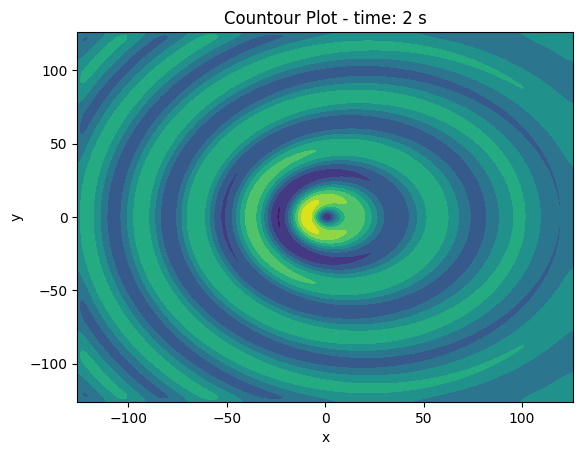

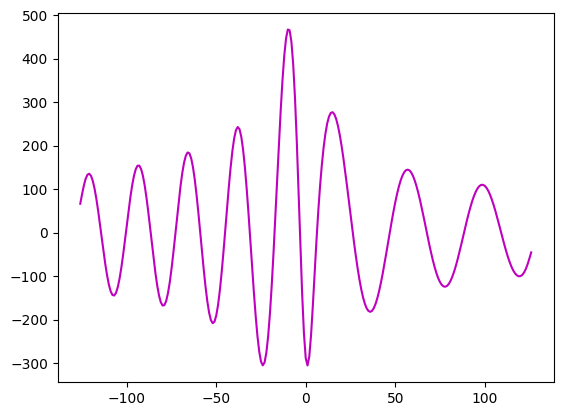

In [2]:
file_path  = PATH_ANALYTICAL.joinpath('monopole_10Hz_M0.2.json')
with open(file_path, 'r') as file:
    mono = load(file)
    nx = mono['nx']
    ny = mono['ny']
    ypos  = np.linspace(mono['ylim'][0], mono['ylim'][1], ny).searchsorted(0) 
    x  = np.linspace(mono['xlim'][0], mono['xlim'][1], nx)
    X = np.array(mono['X'])
    Y = np.array(mono['Y'])
    pressure = mono['time'] 

plt.contourf(X, Y, np.array(pressure['2']).T)
plt.xlabel('x')
plt.ylabel('y')

plt.title('Countour Plot - time: 2 s')
plt.show()

p = np.array(pressure['2']).T[ypos]
plt.plot(x, p, 'm')
plt.show()

##### Solução otimizada

In [3]:
%%time
#Teste symengine
d = 3*42
monopoleFlowSyE(
    t           = [2],
    M           = 0.2,  
    xlim        = (-d, d),
    ylim        = (-d, d),
    nxy         = (2*d+1, 2*d+1),
    savePath    = PATH_ANALYTICAL,
    outName     = 'monopole_10Hz_M0.2_comp_otm.json'
)

----- t obs = 2 -----
 - X = -120.0 - Complete
 - X = -110.0 - Complete
 - X = -100.0 - Complete
 - X = -90.0 - Complete
 - X = -80.0 - Complete
 - X = -70.0 - Complete
 - X = -60.0 - Complete
 - X = -50.0 - Complete
 - X = -40.0 - Complete
 - X = -30.0 - Complete
 - X = -20.0 - Complete
 - X = -10.0 - Complete
 - X = 0.0 - Complete
 - X = 10.0 - Complete
 - X = 20.0 - Complete
 - X = 30.0 - Complete
 - X = 40.0 - Complete
 - X = 50.0 - Complete
 - X = 60.0 - Complete
 - X = 70.0 - Complete
 - X = 80.0 - Complete
 - X = 90.0 - Complete
 - X = 100.0 - Complete
 - X = 110.0 - Complete
 - X = 120.0 - Complete
CPU times: total: 1.33 s
Wall time: 1.48 s


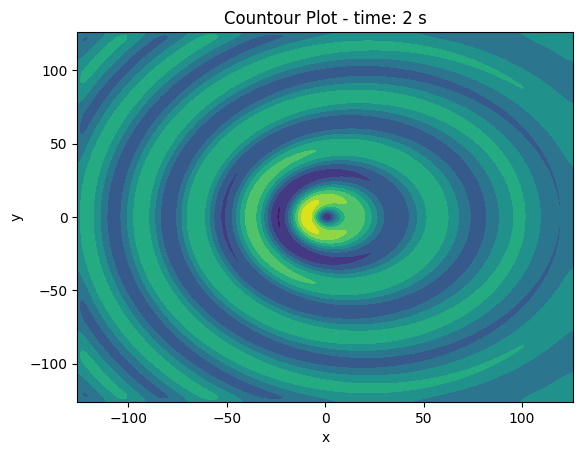

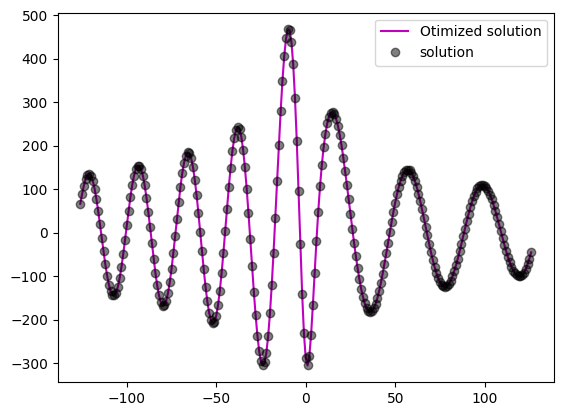

In [6]:
file_path  = PATH_ANALYTICAL.joinpath('monopole_10Hz_M0.2_comp_otm.json')
with open(file_path, 'r') as file:
    mono = load(file)
    nx = mono['nx']
    ny = mono['ny']
    ypos  = np.linspace(mono['ylim'][0], mono['ylim'][1], ny).searchsorted(0) 
    x2  = np.linspace(mono['xlim'][0], mono['xlim'][1], nx)
    X = np.array(mono['X'])
    Y = np.array(mono['Y'])
    pressure = mono['time'] 

plt.contourf(X, Y, np.array(pressure['2']).T)
plt.xlabel('x')
plt.ylabel('y')

plt.title('Countour Plot - time: 2 s')
plt.show()

p2 = np.array(pressure['2']).T[ypos]
plt.plot(x2, p2, 'm', label = 'Otimized solution')
plt.plot(x, p, 'ko', label = 'solution', alpha = 0.5)
plt.legend()
plt.show()

#### Solução para vários time steps

In [ ]:
timeSteps = np.arange(0.5, 3.01, 0.01)
print(len(timeSteps))

# Solução otimizada:

# Solution for $M = 0.2$ and $f = 100 \ Hz$

In [12]:
d = 4*3
monopoleFlowSy(
    t            = [0.5,1,2],
    freq         = 100,
    M            = 0.2,
    alpha        = np.log(2),
    xlim         = (-d, d),
    ylim         = (-d, d),
    nxy          = (10*d+1, 10*d+1),
    savePath     = PATH_ANALYTICAL,
    writeInterval= 1,
    outName      = 'monopole_100Hz_M0.2.json')


----- t obs = 0.5 -----
 - X = -10.0 - Complete
 - X = 0.0 - Complete
 - X = 10.0 - Complete
----- t obs = 1 -----
 - X = -10.0 - Complete
 - X = 0.0 - Complete
 - X = 10.0 - Complete
----- t obs = 2 -----
 - X = -10.0 - Complete
 - X = 0.0 - Complete
 - X = 10.0 - Complete


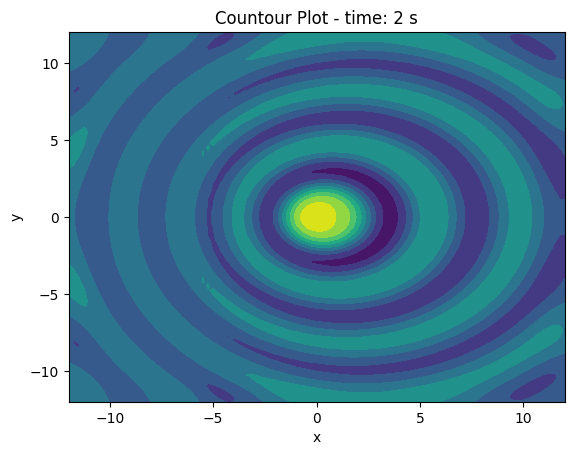

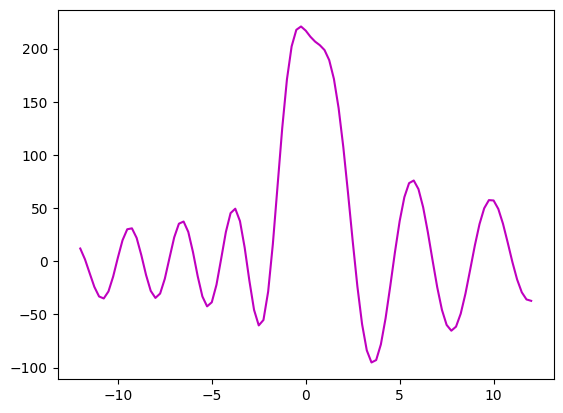

In [13]:
file_path  = PATH_ANALYTICAL.joinpath('monopole_100Hz_M0.2.json')
with open(file_path, 'r') as file:
    mono = load(file)
    nx = mono['nx']
    ny = mono['ny']
    ypos  = np.linspace(mono['ylim'][0], mono['ylim'][1], ny).searchsorted(0) 
    x  = np.linspace(mono['xlim'][0], mono['xlim'][1], nx)
    X = mono['X']
    Y = mono['Y']
    pressure = mono['time']



plt.contourf(X, Y, np.array(pressure['2']).T)
plt.xlabel('x')
plt.ylabel('y')

plt.title('Countour Plot - time: 2 s')
plt.show()

p = np.array(pressure['2']).T[ypos]
plt.plot(x, p, 'm')
plt.show()